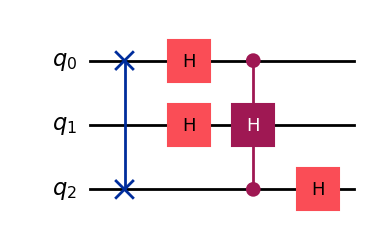

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))

Unitary matrix of the circuit:
[[ 3.53553391e-01-1.56076626e-18j  3.53553391e-01-2.11869220e-17j
   3.53553391e-01-1.56076626e-18j  3.53553391e-01-2.11869220e-17j
   3.53553391e-01-1.56076626e-18j  3.53553391e-01-2.11869220e-17j
   3.53553391e-01-1.56076626e-18j  3.53553391e-01-2.11869220e-17j]
 [ 3.53553391e-01+2.75355493e-17j  5.00000000e-01-6.73190513e-17j
   3.53553391e-01+2.75355493e-17j -5.88784672e-17+4.35788200e-33j
  -3.53553391e-01-2.75355493e-17j -5.00000000e-01+6.73190513e-17j
  -3.53553391e-01-2.75355493e-17j  5.88784672e-17-4.35788200e-33j]
 [ 3.53553391e-01+1.56076626e-18j  3.53553391e-01+2.11869220e-17j
  -3.53553391e-01-1.56076626e-18j -3.53553391e-01-2.11869220e-17j
   3.53553391e-01+1.56076626e-18j  3.53553391e-01+2.11869220e-17j
  -3.53553391e-01-1.56076626e-18j -3.5355339

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
#from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import HGate
from qiskit.quantum_info import Operator


#  hartley matrix
#so  L1 is a double hadamard and a hadamard method rotation.
#L3 is a tensor tensor hadamard
#L2 is a tesnor hadamard tensor
#and p is a 3 qubit permutation gate


qc=QuantumCircuit(3)

#do bit reverse order , swap qubits 0 and 2
qc.swap(0,2)

qc.h(0) #apply hadmard on qubit 2(last one )

qc.h(1) #apply hadamard on qubit 1

cch = HGate().control(2) #used library to actually implement double controlled hadamard gate
qc.append(cch, [0, 2, 1]) # control poitns are the first and last qubits

qc.h(2)

display(qc.draw('mpl'))

# Get Theoretical Statevector
statevector = Statevector.from_instruction(qc)
display(statevector)

# Get the unitary matrix using Operator
unitary_matrix = Operator(qc).data

# Print the unitary matrix
print("\nUnitary matrix of the circuit:")
print(unitary_matrix)


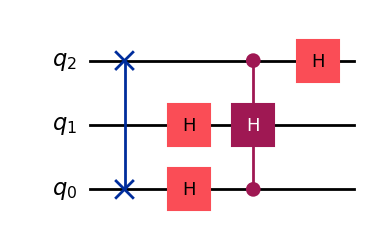

In [8]:
# Here we only visually flip the circuit to match the publications
display(qc.draw('mpl',reverse_bits=True))